['diabetes', 'heart', 'house']
1 diabetes
2 heart
3 house
speak to read....
stop
You said:  number 1
diabetes
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

 

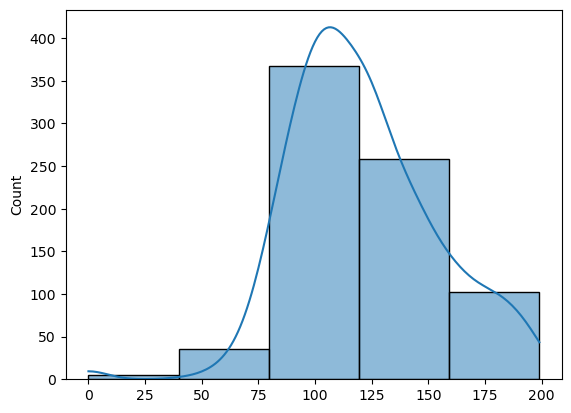

In [3]:
import time
import speech_recognition as sr
from gtts import gTTS as gs
from io import BytesIO
from pygame import mixer
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vc = sr.Recognizer()
audio = ''

def speak(txt,ln,td):
    mp3_fp = BytesIO()
    tts = gs(text = txt, lang=ln,tld=td)
    tts.write_to_fp(mp3_fp)
    return mp3_fp

def playBack(txt,lan,td):
    mixer.init()
    #txt = "Passengers kindly attention please.  Train number 2 2 3 0 6, Vaigai Express, from Thiruchirapalli to Madurai, is arriving on platform number 8"
    #txt = 'சென்னைக்கு வரவேற்கிறோம்'
    sound = speak(txt,lan,td)
    sound.seek(0)
    mixer.music.load(sound,'mp3')
    mixer.music.play()

import gtts

def sentence_reader(cat):
    with sr.Microphone() as source:
        print ("speak to read....")
        audio = vc.listen(source, phrase_time_limit = 10)
    print ("stop")


    try:
        text = vc.recognize_google(audio,language = 'en')
        print ("You said: ", text)
        t = "You said, %s %s"%(cat,text)
        playBack(t,'en','co.in')
        time.sleep(3)
        return t
    except:
        print ("Could not understand your audio.  Please try again.")

def sentence_reader_file_col():
    vc = sr.Recognizer()
    audio = ''
    with sr.Microphone() as source:
        print ("speak to read....")
        audio = vc.listen(source, phrase_time_limit = 10)
    print ("stop")
    text = ''
    text = vc.recognize_google(audio,language = 'en')
    print (text)
    try:
        text = vc.recognize_google(audio,language = 'en')
        print (text)
        print ("You said: ", text)
        t = f"You said, {text} to continue"
        playBack(t,'en','co.in')
        time.sleep(3)
        if 'yes' not in text.lower() and 'no' not in text.lower():
            t = "You have given an invalid input.  hence the program is terminated"
            playBack(t, 'en', 'co.in')
            t = 'no'
        return 'yes' if 'yes' in text else 'no'
    except:
        print (text)
        k = "You have not say anything. Hence Program is terminated"
        playBack(k,'en','co.in')
        
def get_file_data(fl):
    df = pd.read_csv(r"C:\Users\sujivenkatasamy\Downloads\dataset\%s.csv"%(fl))
    return df

def say_row_count(count_row,count_column):
    txt = f"The chosen file has {count_row} number of rows and {count_column} number of columns."
    playBack(txt,'en','co.in')
    
def get_query_val():
    txt = "Do you want me to say the column names? say yes or no."
    playBack(txt,'en','co.in')
    time.sleep(5);
    read_check = sentence_reader_file_col()
    return read_check
        
def say_col_name(cols):
    col_no = 1
    time.sleep(4)
    for c in cols:
        txt = f"column number {col_no}. {c}"
        playBack(txt,'en','co.in')
        time.sleep(3)
        col_no += 1
    
def get_File(lst):
    #txt = "I have two files. File number 1, Diabetes file.  File number 2, Heart file"
    txt = "I have %s files."%(len(lst))
    fl_no = 1;scnd = 3;
    for f in lst:
        txt += f"  File number {fl_no}, {f} file."
        fl_no += 1
        scnd += 2.5
        
    playBack(txt,'en','co.in')
    time.sleep(scnd)
    txt = "To select particular file, please say the file number"
    playBack(txt,'en','co.in')

    time.sleep(5)
    fl_n = sentence_reader('file')
    fn = re.findall('\d',fl_n)
    print (lst[int(fn[0])-1])
    file_df = get_file_data(lst[int(fn[0])-1])
    print (file_df)
    say_row_count(len(file_df), len(file_df.columns))
    time.sleep(7)
    if get_query_val() == 'yes':
        say_col_name(list(file_df.columns))
        
        txt = 'To display the distribution plot, Please say any column number'
        playBack(txt,'en','co.in')
        time.sleep(7)
        fl_n = sentence_reader('column')
        fn = re.findall('\d',fl_n)
        col_lst = list(file_df.columns)
        
        txt = f"Distribution plot for the selected column {col_lst[int(fn[0])-1]} obtained as following."
        playBack(txt, 'en', 'co.in')
        print (col_lst[int(fn[0])-1])
        sns.histplot(file_df[col_lst[int(fn[0])-1]].tolist(), bins=5, kde=True)
        plt.show()
    
if __name__ == "__main__":
    fl_l = os.listdir(r"C:\Users\sujivenkatasamy\Downloads\dataset")
    #lst = ['Diabetes', 'Heart']
    lst = [x.split(".csv")[0] for x in fl_l]
    print (lst)
    no = 1
    for f in lst:
        print (no,f)
        no += 1
    get_File(lst)